## Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

In [2]:
# change the path if necessary
df = pd.read_csv('train.csv')

In [3]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Pengamatan\:
1. Data terdiri dari `381109 baris`
2. Tidak ada kolom yang memiliki null/missing values `(Non-Null Count = jumlah baris)`
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai)

## Cuplikan Data

In [4]:
# run code ini beberapa kali
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
103165,103166,Female,26,1,41.0,1,< 1 Year,No,21118.0,152.0,289,0
274342,274343,Female,23,1,6.0,1,< 1 Year,No,26375.0,152.0,114,0
9813,9814,Male,21,1,45.0,0,1-2 Year,Yes,2630.0,156.0,286,0
199705,199706,Male,49,1,15.0,0,> 2 Years,Yes,2630.0,26.0,199,1
18046,18047,Male,57,1,48.0,1,1-2 Year,No,2630.0,124.0,39,0


## Statistical Summary

In [5]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Age', 'Vintage', 'Annual_Premium']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

In [6]:
# ringkasan statistik dari kolom numerik
df[nums].describe().round(2)

,Age,Vintage,Annual_Premium
count,381109.00,381109.00,381109.00
mean,38.82,154.35,30564.39
std,15.51,83.67,17213.16
min,20.00,10.00,2630.00
25%,25.00,82.00,24405.00
50%,36.00,154.00,31669.00
75%,49.00,227.00,39400.00
max,85.00,299.00,540165.00


Beberapa pengamatan:
1. Rata-rata usia nasabah adalah `38.82 tahun`.
2. Rata-rata premi tahunan yang dibayar oleh nasabah adalah `30,564.39`.
3. Rata-rata jumlah hari sejak nasabah bergabung dengan perusahaan asuransi (vintage) adalah `154.35 hari`.
4. Standar deviasi usia nasabah adalah 15.51 tahun.
5. Standar deviasi premi tahunan adalah 17,213.16.
6. Standar deviasi vintage adalah 83.67 hari.
7. Usia nasabah termuda adalah 20 tahun dan yang tertua adalah 85 tahun.
8. Premi tahunan terendah yang dibayarkan oleh nasabah adalah 2,630 dan tertinggi adalah 540,165.
9. Rata-rata vintage untuk nasabah berada di sekitar `154 hari`.
10. Kuartil pertama dari usia nasabah adalah 25 tahun dan kuartil ketiga adalah 49 tahun. Hal ini menunjukkan bahwa sebagian besar nasabah berada di rentang usia antara 25 dan 49 tahun.
11. Kuartil pertama dari premi tahunan adalah 24,405 dan kuartil ketiga adalah 39,400. Ini menunjukkan bahwa sebagian besar nasabah membayar premi dalam rentang antara 24,405 dan 39,400.
12. Kuartil pertama dari vintage adalah 82 hari dan kuartil ketiga adalah 227 hari. Ini menunjukkan bahwa sebagian besar nasabah telah bergabung dengan perusahaan asuransi selama rentang waktu antara 82 dan 227 hari.

In [7]:
# categorical columns 
df[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']] = df[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']].astype(object)
df[cats].describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109.0,381109,381109,381109.0,381109
unique,2,2,53.0,2,2,155.0,2
top,Male,1,28.0,0,Yes,152.0,0
freq,206089,380297,106415.0,206481,192413,134784.0,334399


Beberapa pengamatan:
1. Terdapat dua jenis kelamin `(gender)`, yaitu Male dan Female.
2. Jumlah nasabah yang memiliki SIM `(Driving_License)` adalah 381109, dimana 380297 nasabah memiliki SIM dan 812 nasabah tidak memiliki SIM.
3. Terdapat 53 kode wilayah `(Region_Code)` yang tercatat dalam data.
4. Terdapat 155 saluran penjualan kebijakan `(Policy_Sales_Channel)` yang digunakan untuk menjual produk asuransi kepada nasabah.
6. Ada 206,481 nasabah yang belum memiliki asuransi sebelumnya `(Previously_Insured)`, dan 174,628 nasabah lainnya sudah memiliki asuransi sebelumnya.
7. Kendaraan yang diasuransikan terbagi menjadi tiga kategori umur `(Vehicle_Age)`, yaitu 1-2 tahun, < 1 tahun, dan > 2 tahun.
8.  Kendaraan yang diasuransikan juga terbagi menjadi dua kategori kerusakan `(Vehicle_Damage)`, yaitu Yes dan No. Sebanyak 192,413 nasabah memiliki kendaraan yang pernah mengalami kerusakan (Yes), - sementara sisanya 188,696 nasabah memiliki kendaraan yang belum pernah mengalami kerusakan (No).
9. Nasabah dengan jenis kelamin laki-laki (Male) lebih banyak dibandingkan dengan nasabah perempuan (Female), dengan jumlah 206,089 dan 175,020, masing-masing.
10. Hampir semua nasabah dalam dataset memiliki SIM `(Driving_License)`, hanya ada 812 nasabah yang tidak memiliki SIM.
11. Wilayah dengan kode 28.0 (Region_Code) memiliki jumlah nasabah terbanyak, yaitu sebesar 106,415 nasabah.
12. Saluran penjualan kebijakan dengan nomor 152.0 `(Policy_Sales_Channel)` digunakan oleh nasabah terbanyak dalam membeli produk asuransi, yaitu sebanyak 134,784 nasabah.
13. Lebih dari setengah nasabah (206,481) belum pernah memiliki asuransi sebelumnya (Previously_Insured).
14. Sebagian besar kendaraan yang diasuransikan dalam dataset berusia 1-2 tahun (200,316).
15. Kendaraan yang pernah mengalami kerusakan `(Vehicle_Damage = Yes)` dimiliki oleh sebagian besar nasabah (192,413).

# `1. Data Cleansing`

## Missing Data
Pada tahapan ini dilakukan proses mengatasi atau menangani nilai-nilai yang kosong atau tidak tersedia pada dataset. Hal ini diperlukan karena keberadaan `missing value` dapat memengaruhi kualitas dan akurasi hasil analisis yang dilakukan pada dataset.

In [138]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Dapat diketahui, dari Dataset yang diberikan terdiri dari 11 kolom dengan jumlah baris tidak diketahui (tidak disebutkan). Setiap kolom memiliki tipe data yang berbeda-beda, dengan jumlah `missing value (nilai kosong)` pada setiap kolom bernilai 0.

## Duplicated Data
Pada tahapan ini dilakukan proses mengidentifikasi dan menghapus atau mengubah data yang sama atau duplikat yang terdapat dalam suatu dataset. Duplikat dapat terjadi karena kesalahan input data, duplikasi data dari sumber yang berbeda, atau pengulangan data dalam waktu yang berbeda. Kehadiran data duplikat dapat mempengaruhi analisis dan model yang dihasilkan karena data duplikat dapat mempengaruhi hasil statistik dan menghasilkan model yang bias.

In [139]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

Dapat diketahui, dari Dataset yang diberikan terdiri dari 11 kolom dengan jumlah baris tidak diketahui (tidak disebutkan). Setiap kolom memiliki tipe data yang berbeda-beda, dengan jumlah `data duplikat` pada setiap kolom bernilai 0.

## Outliers Handling

Pada tahapan ini dilakukan proses untuk menangani data yang dianggap sebagai outlier, yaitu data yang jauh berbeda dengan data lainnya atau data yang berada di luar rentang normal atau standar. Outliers handling dilakukan untuk meminimalkan pengaruh data yang tidak biasa atau ekstrem terhadap analisis statistik atau machine learning yang akan dilakukan. 

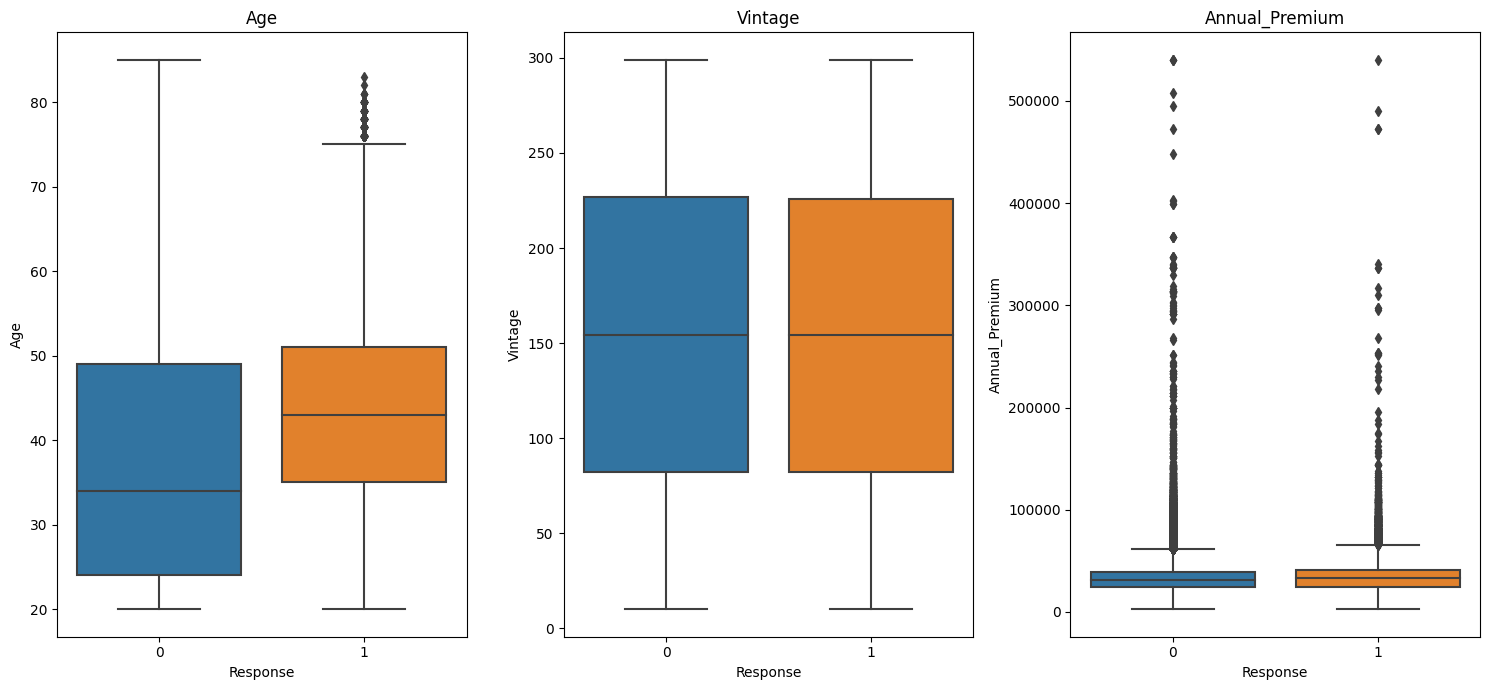

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,7))

for i in range(0, len(nums)):
    sns.boxplot(y=df[nums[i]],x=df["Response"], orient="v", ax=axes[i])
    axes[i].set_title(nums[i])
    
plt.tight_layout()
plt.show()

Kita ketahui, bahwa dari pada fitur yang termasuk `nums` kolom `Annual_Premium` perlu dilakukan handle outliers.

Sedangkan untuk fitur `Age` tidak perlu dilakukan handling outliers, karena untuk kasus pada dataset ini berapapun walau terdapat pencilan atau outlier pada fitur `Age`, setelah dilakukan pengecekan, pertimbangan dan diskuskusi lebih lanjut disimpulkan nilai pada outlier tersebut memang valid dan memang hanya menjadi minor diantara nilai lainnya. Maka tidak perlu dilakukan handling outlier.

In [10]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

Q1_ap = df['Annual_Premium'].quantile(0.25)
Q3_ap = df['Annual_Premium'].quantile(0.75)
IQR_ap = Q3_ap - Q1_ap
lower_limit_ap = Q1_ap - 1.5*IQR_ap
upper_limit_ap = Q3_ap + 1.5*IQR_ap
df = df[(df['Annual_Premium'] > lower_limit_ap) & (df['Annual_Premium'] < upper_limit_ap)]

# Q1_age = df['Age'].quantile(0.25)
# Q3_age = df['Age'].quantile(0.75)
# IQR_age = Q3_age - Q1_age
# lower_limit_age = Q1_age - 1.5*IQR_age
# upper_limit_age = Q3_age + 1.5*IQR_age
# df = df[(df['Age'] > lower_limit_age) & (df['Age'] < upper_limit_age)]

print(f'Jumlah data setelah handling outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah data setelah handling outlier: 370779


Kode di atas akan menghapus data pada kolom `Annual_Premium` dan `Age` yang berada di luar rentang lower_limit dan upper_limit. Rentang ini ditentukan berdasarkan `IQR (Interquartile Range)` dari kolom tersebut. Data yang dihapus adalah data yang dianggap sebagai outliers.

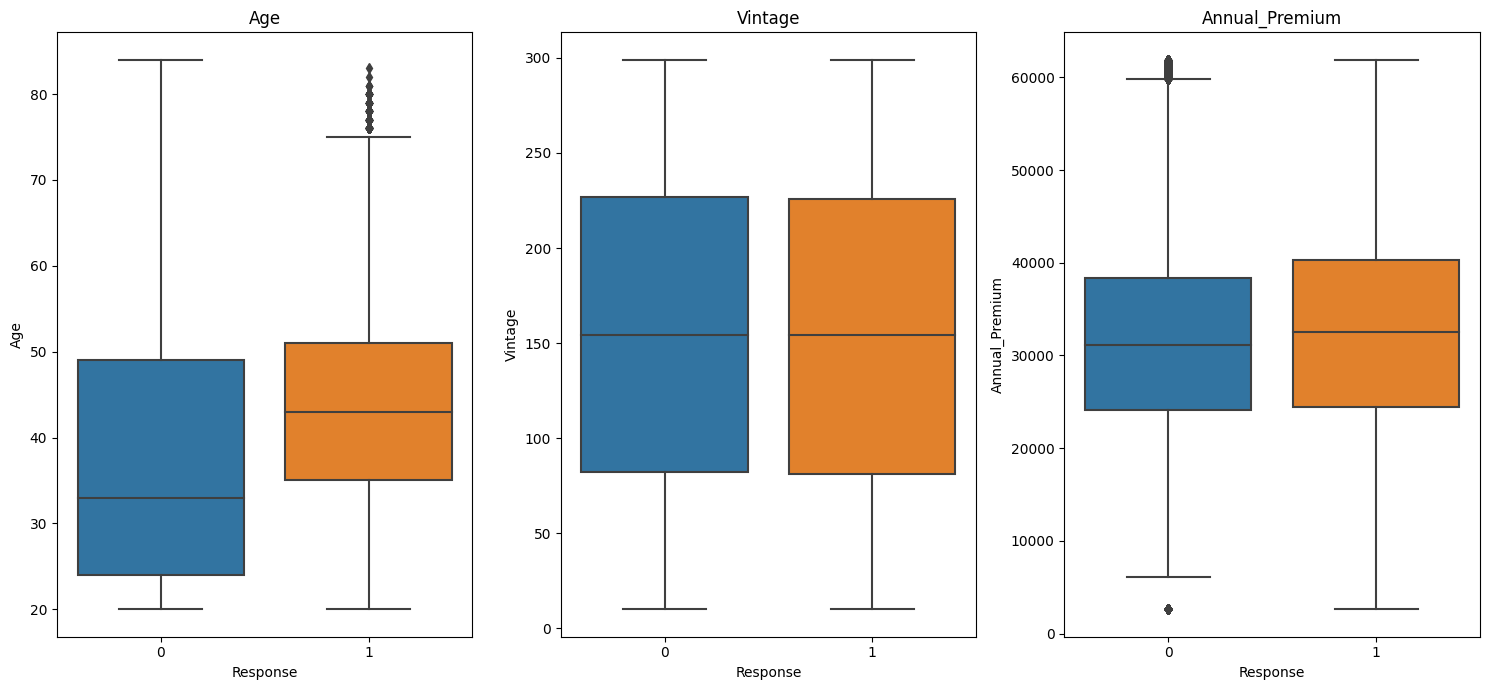

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,7))

for i in range(0, len(nums)):
    sns.boxplot(y=df[nums[i]],x=df["Response"], orient="v", ax=axes[i])
    axes[i].set_title(nums[i])
    
plt.tight_layout()
plt.show()

Untuk memastikan kembali, bahwa hasil dari setelah dilakukan handling outlier jumlah kolom yang tersisa sesuai maka dilakukan kembali pengecekan menggunakan baris kode `df.info()`.

In [12]:
# informasi general tentang dataframe terbaru hasil filter handling outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370779 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370779 non-null  int64  
 1   Gender                370779 non-null  object 
 2   Age                   370779 non-null  int64  
 3   Driving_License       370779 non-null  object 
 4   Region_Code           370779 non-null  object 
 5   Previously_Insured    370779 non-null  object 
 6   Vehicle_Age           370779 non-null  object 
 7   Vehicle_Damage        370779 non-null  object 
 8   Annual_Premium        370779 non-null  float64
 9   Policy_Sales_Channel  370779 non-null  object 
 10  Vintage               370779 non-null  int64  
 11  Response              370779 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 36.8+ MB


## Feature Transformation

In [13]:
df.describe().round(2)

,id,Age,Annual_Premium,Vintage
count,370779.00,370779.00,370779.00,370779.00
mean,190535.40,38.67,29264.73,154.35
std,110037.57,15.44,14742.98,83.67
min,1.00,20.00,2630.00,10.00
25%,95217.50,25.00,24102.00,82.00
50%,190530.00,36.00,31319.00,154.00
75%,285824.50,49.00,38596.00,227.00
max,381109.00,84.00,61892.00,299.00


## Normalization/Standardization

Berdasarkan hasil describe di atas, fitur `Age`, `Annual_Premium` dan `Vintage` memiliki rentang nilai yang jauh berbeda range-nya. 

Kolom `Age` memiliki rentang nilai antara `15 hingga 84`, lalu kolom `Annual_Premium` memiliki rentang nilai yang besar juga, dan fitur `Vintage` juga memiliki rentan nilai yang jauh berbeda. 

Oleh karena itu, sebaiknya dilakukan normalisasi/standarisasi pada kedua kolom ini agar memiliki rentang nilai yang tidak terlalu jauh. 

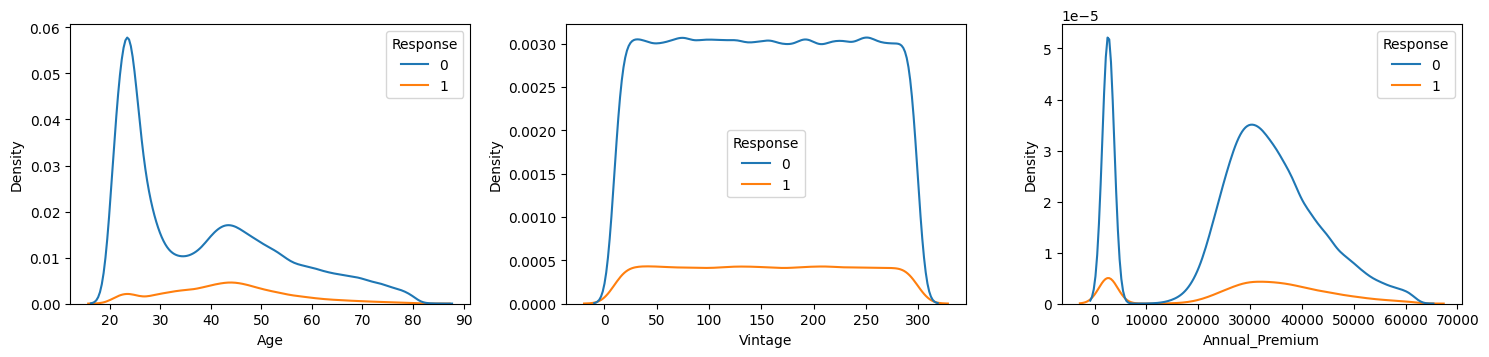

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,10))

for i in range(0, len(nums)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[nums[i]], hue=df['Response'])

plt.xlabel(nums[i])
plt.tight_layout()

Berdasarkan hasil plot diatas, dapat diketahui bahwa ternyata :

- Fitur `Age` karena distribusinya skeww ke kanan, atau tidak normal maka perlu dilakukan `Normalisasi`
- Fitur `Vintage` karena distribusinya normal, maka perlu dilakukan `Standarisasi`
- Fitur `Annual Premium` karena distribusinya skeww, maka perlu dilakukan `Normalisasi`

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_standarisasi = StandardScaler()
df[['Vintage']] = scaler_standarisasi.fit_transform(df[['Vintage']])

scaler_normalisasi = MinMaxScaler()
df[['Age', 'Annual_Premium']] = scaler_normalisasi.fit_transform(df[['Age', 'Annual_Premium']])

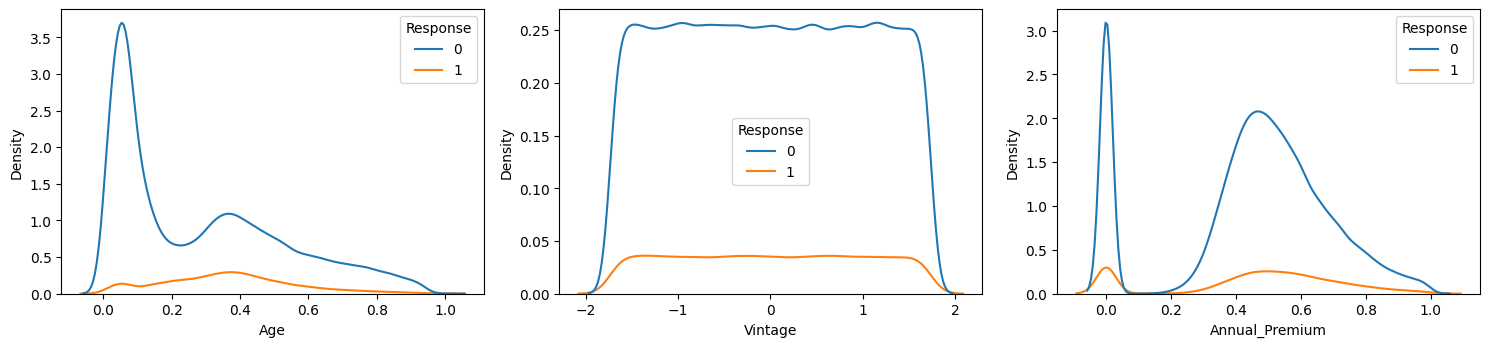

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=len(nums), figsize=(15,10))

for i in range(0, len(nums)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[nums[i]], hue=df['Response'])

plt.xlabel(nums[i])
plt.tight_layout()

In [18]:
# cek keberhasilan feature transformation
df.describe().round(2)

,id,Age,Annual_Premium,Vintage
count,370779.00,370779.00,370779.00,370779.00
mean,190535.40,0.29,0.45,0.00
std,110037.57,0.24,0.25,1.00
min,1.00,0.00,0.00,-1.73
25%,95217.50,0.08,0.36,-0.86
50%,190530.00,0.25,0.48,-0.00
75%,285824.50,0.45,0.61,0.87
max,381109.00,1.00,1.00,1.73


Dari hasil transformasi yang dilakukan, terlihat bahwa:

1. Fitur `Age` memiliki rata-rata 0.29 dan standar deviasi 0.24 setelah dilakukan normaisasi
2. Fitur `Annual_Premium` memiliki rata-rata 0.45 dan standar deviasi 0.25 setelah dilakukan normalisasi
3. Fitur `Vintage` memiliki rata-rata 0.00 dan standar deviasi 1.00 setelah dilakukan standarisasi

## Feature Encoding

In [19]:
cats_updated = ['Vehicle_Damage', 'Vehicle_Age'] 

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Vehicle_Damage
Yes    186555
No     184224
Name: Vehicle_Damage, dtype: int64
------------------------------ 

value counts of column Vehicle_Age
1-2 Year     194202
< 1 Year     161547
> 2 Years     15030
Name: Vehicle_Age, dtype: int64
------------------------------ 



Strategi encoding
* `Vehicle_Damage` & `Vehicle_Age` \: Label Encoding, atau Mapping.
* `Gender` : One Hot Encoding

In [20]:
mapping_Vehicle_Damage = {
    'Yes' : 1,
    'No' : 0
}

mapping_Vehicle_Age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2,
}

df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_Vehicle_Damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_Vehicle_Age)

df = pd.get_dummies(df, columns=['Gender'])

In [21]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,0.375000,1,28.0,0,2,1,0.638250,26.0,0.748828,1,0,1
1,2,0.875000,1,3.0,0,1,0,0.521515,26.0,0.342470,0,0,1
2,3,0.421875,1,28.0,0,2,1,0.601802,26.0,-1.521996,1,0,1
3,4,0.015625,1,11.0,1,0,0,0.438544,152.0,0.581504,0,0,1
4,5,0.140625,1,41.0,1,0,0,0.419594,152.0,-1.378575,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370779 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    370779 non-null  int64  
 1   Age                   370779 non-null  float64
 2   Driving_License       370779 non-null  object 
 3   Region_Code           370779 non-null  object 
 4   Previously_Insured    370779 non-null  object 
 5   Vehicle_Age           370779 non-null  int64  
 6   Vehicle_Damage        370779 non-null  int64  
 7   Annual_Premium        370779 non-null  float64
 8   Policy_Sales_Channel  370779 non-null  object 
 9   Vintage               370779 non-null  float64
 10  Response              370779 non-null  object 
 11  Gender_Female         370779 non-null  uint8  
 12  Gender_Male           370779 non-null  uint8  
dtypes: float64(3), int64(3), object(5), uint8(2)
memory usage: 34.7+ MB


Pada tahapan ini dilakukan kembali pengecekan type data dari masing-masing fitur apakah sudah sesuai. Dan didapat kesimpulan semua data sudah sesuai.

## Imbalanced Dataset

In [23]:
response_counts = df['Response'].value_counts()
print(response_counts)

0    325624
1     45155
Name: Response, dtype: int64


In [24]:
# pemisahan features vs target
X = df.drop('Response', axis=1)
y = df['Response']
print(X.shape)
print(y.shape)

(370779, 12)
(370779,)


In [26]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

le = LabelEncoder()
y = le.fit_transform(y)

rus = RandomUnderSampler()

# apply RandomUnderSampler to the dataset
X_rus, y_rus = rus.fit_resample(X, y)

# convert y_rus to pandas Series
y_rus = pd.Series(y_rus)

# check the class distribution
print(y_rus.value_counts())

0    45155
1    45155
dtype: int64


Setelah dilakukan analisis lebih lanjut, dan berdasarkan hasil diskusi maka ditentukan untuk metode yang digunakan supaya data lebih balance menggunakan metode `Undersampling`. Output yang dihasilkan menunjukkan bahwa setelah dilakukan undersampling, jumlah data pada kedua kelas menjadi sama dan seimbang, yaitu masing-masing `45155`.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model on original dataset
model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Original Dataset")
print(classification_report(y_test, y_pred))

# perform random undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
model = LogisticRegression(random_state=42).fit(X_rus, y_rus)
y_pred = model.predict(X_test)
print("Random Undersampling")
print(classification_report(y_test, y_pred))

Original Dataset
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     65099
           1       0.00      0.00      0.00      9057

    accuracy                           0.88     74156
   macro avg       0.44      0.50      0.47     74156
weighted avg       0.77      0.88      0.82     74156

Random Undersampling
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     65099
           1       0.17      0.47      0.25      9057

    accuracy                           0.66     74156
   macro avg       0.54      0.58      0.52     74156
weighted avg       0.81      0.66      0.72     74156



In [28]:
# perform random oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
model = LogisticRegression(random_state=42).fit(X_ros, y_ros)
y_pred = model.predict(X_test)
print("Random Oversampling")
print(classification_report(y_test, y_pred))

# perform SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
model = LogisticRegression(random_state=42).fit(X_smote, y_smote)
y_pred = model.predict(X_test)
print("SMOTE")
print(classification_report(y_test, y_pred))

Random Oversampling
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     65099
           1       0.25      0.98      0.40      9057

    accuracy                           0.64     74156
   macro avg       0.62      0.79      0.57     74156
weighted avg       0.90      0.64      0.70     74156

SMOTE
              precision    recall  f1-score   support

           0       0.90      0.68      0.78     65099
           1       0.17      0.47      0.25      9057

    accuracy                           0.66     74156
   macro avg       0.54      0.58      0.51     74156
weighted avg       0.81      0.66      0.71     74156



# `2. Feature Engineering`

## Feature Selection 

Dari dataset yang diberikan, beberapa fitur yang mungkin perlu dibuang atau tidak terpakai yakni : 

1. `id`: Fitur ini seharusnya tidak memberikan pengaruh pada prediksi apapun, karena hanya merupakan sebuah identifikasi untuk setiap data dan tidak berkaitan dengan masalah prediksi.
2. `Region_Code`: Fitur ini hanya menunjukkan kode wilayah dari pelanggan. Namun, tidak jelas apakah informasi ini dapat memberikan kontribusi signifikan terhadap prediksi.
3. `Policy_Sales_Channel`: Fitur ini merupakan channel yang digunakan oleh pelanggan untuk membeli asuransi. Namun, terdapat 155 jenis channel yang berbeda, yang membuatnya sulit untuk diolah dan memerlukan preprocessing khusus. Selain itu, informasi ini mungkin tidak memiliki korelasi yang kuat dengan masalah prediksi.

## Feature Extraction

Untuk menambah fitur, perlu analisa lebih lanjut sesuai keadaan atau kondisi. Karena, penambahan fitur juga dapat mempengaruhi hasil model.
Untuk sementara pada kasus ini, disimpulkan tidak perlu ditambahkan fitur.

Perlu dipertimbangkan untuk ditambah, ekstraksi dari fitur :

1. `Age` : Kategorikan jadi Muda, Tua dst.
2. `Vintage` : Kategorikan jadi New User, Retain User.

# `3. Upload Git`